In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
# Load the dataset
file_path = "diabetes.csv"
df = pd.read_csv(file_path)

# Identify columns where zero values are unrealistic
cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Replace zero values with NaN for proper handling
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# Fill missing values with the median of each column
for col in cols_with_zeros:
    df[col] = df[col].fillna(df[col].median())

# Verify if missing values are handled
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


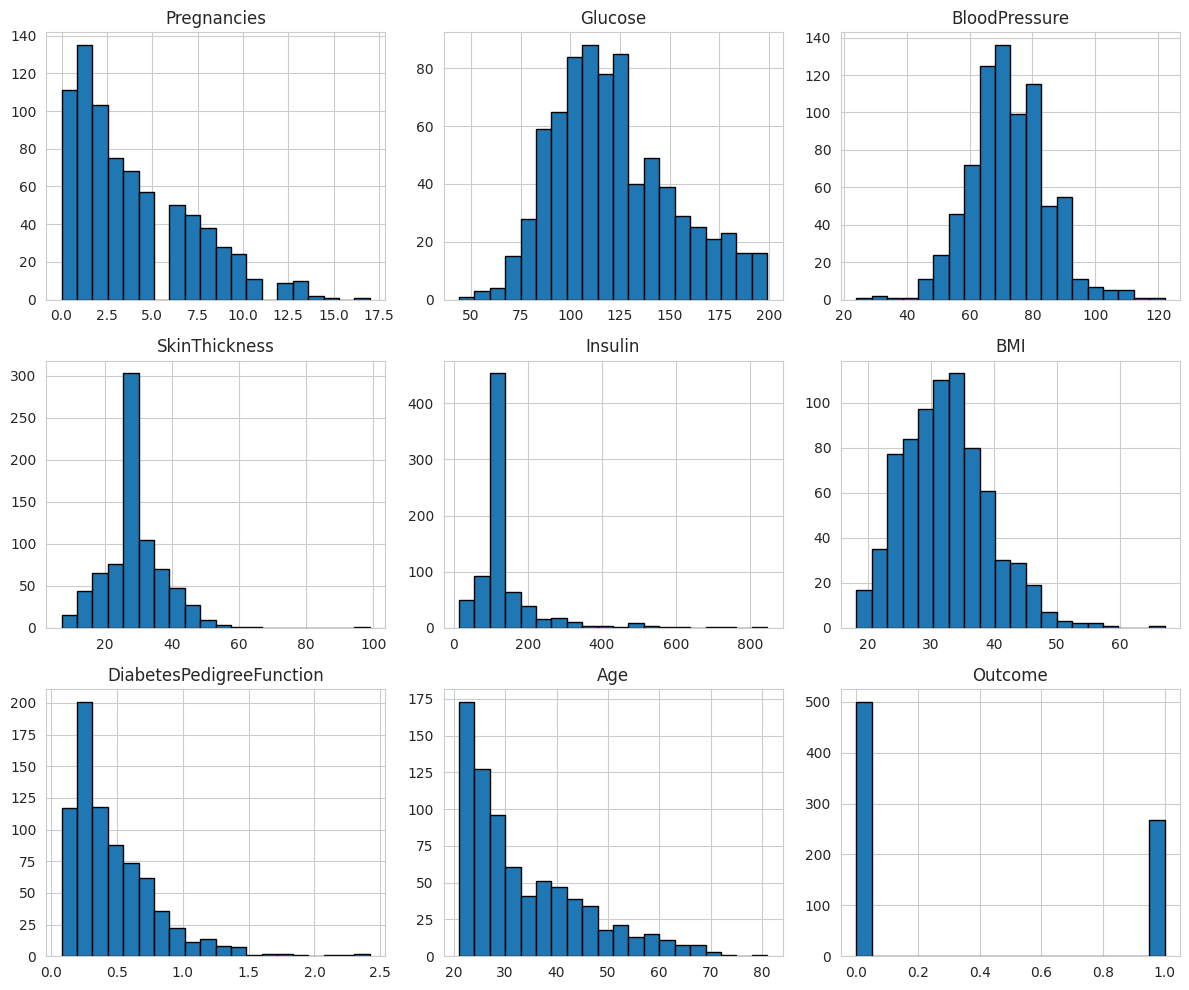

In [ ]:
# Analyze feature distributions
sns.set_style("whitegrid")
df.hist(figsize=(12, 10), bins=20, edgecolor="black")
plt.tight_layout()
plt.show()

Criterion: gini
Accuracy: 0.7208
Precision: 0.5833
Recall: 0.7636
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.70      0.76        99
           1       0.58      0.76      0.66        55

    accuracy                           0.72       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.72      0.73       154

--------------------------------------------------
Criterion: entropy
Accuracy: 0.7143
Precision: 0.5714
Recall: 0.8000
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.67      0.75        99
           1       0.57      0.80      0.67        55

    accuracy                           0.71       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.76      0.71      0.72       154

--------------------------------------------------


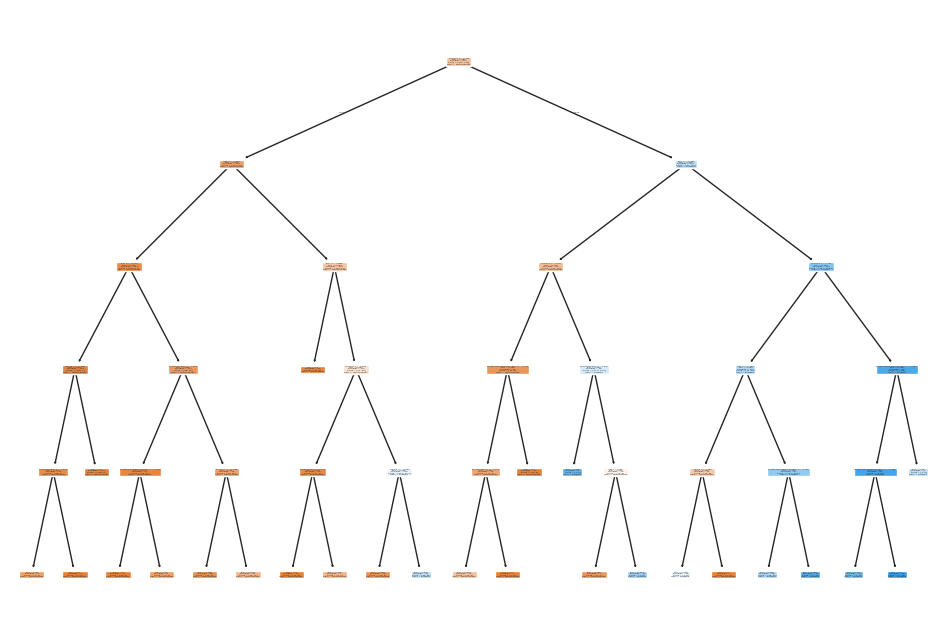

In [ ]:
# Split dataset into features and target variable
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# Apply feature scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate Decision Tree model
def evaluate_model(criterion):
    clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, criterion=criterion, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f"Criterion: {criterion}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)

    return clf

# Evaluate both Gini and Entropy criteria
clf_gini = evaluate_model("gini")
clf_entropy = evaluate_model("entropy")

# Visualize the Decision Tree with the better-performing criterion
better_clf = clf_gini if accuracy_score(y_test, clf_gini.predict(X_test)) > accuracy_score(y_test, clf_entropy.predict(X_test)) else clf_entropy

plt.figure(figsize=(12, 8))
plot_tree(better_clf, feature_names=X.columns, class_names=["Non-Diabetic", "Diabetic"], filled=True)
plt.show()

1. Which splitting criterion (Gini Index or Entropy) performed better for this dataset,
and why might that be the case?

Gini Index:
Accuracy: 0.7208
Entropy:
Accuracy: 0.7143

Both models performed similarly, but Gini slightly outperformed Entropy in accuracy and precision, while Entropy had a higher recall (better at identifying positive cases).

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


2. Is there any noticeable trend between "BMI" and diabetes presence in the dataset?

Yes, Positive Correlation.
